### <a id='overview'>1. Overview</a>

#### Motivation
- As an ardent NBA fan, I am interested in finding out the answers of some broad questions about the NBA championship history 
- Below show some interesting visuals and facts 
  - NBA Championship History map can be seen in my Tableau project [here](https://public.tableau.com/app/profile/kam.leung.yeung/viz/NBAChampionshipHistory1947to2021/Dashboard1). Below is a screenshot.
  - Each team's archenemy is shown in the following plot.



<a href="https://public.tableau.com/app/profile/kam.leung.yeung/viz/NBAChampionshipHistory1947to2021/Dashboard1"><img src="nba_tableau.PNG" alt="Drawing" style="width: 600px;" align="left"/></a>

<img src="./Nemesis.png" width="700" align="left"/>

#### Method
Skills
- NBA team and champion history information are scrapped from wikipedia using BeautifulSoup
- Scrapped data is cleaned with regular expression and pandas
- sql(pandasql) and pandas were used to answer most of the questions

Data sources
- [List of NBA champions](https://en.wikipedia.org/wiki/List_of_NBA_champions)
- [Current NBA teams](https://en.wikipedia.org/wiki/National_Basketball_Association#Teams)

#### Questions
1. Most frequency NBA Finals Outcome  
2. Total Championship Won by each Team
3. Total Title Loss by each Team
4. Which franchise has lost most often in the NBA finals
5. Which teams made the finals but never won the championship?
6. Which team were swept in the NBA Finals and in what year?
7. Which year and teams pushed to a game 7 in the NBA Finals?
8. Which city has endured the most NBA Finals loss
9. Of teams who have won at least one championship, what is the probability that a team win if they make it to the final?
10. Who is each team nemesis? For each team that made the NBA finals, to whom did they lose to for at least twice?


### <a id='sam'>2. About the author: Kam Leung Yeung (Sam)</a>

* PhD in Cognitive Psychology, Iowa State University in Ames, Iowa, USA

**Social media**:

* [LinkedIn](https://www.linkedin.com/in/kamleungyeung/)
* [Google Scholar](https://scholar.google.com/citations?user=OwUmaN8AAAAJ)
* [GitHub](https://github.com/k-l-yeung)
* [Tableau](https://public.tableau.com/app/profile/kam.leung.yeung#!/)


### <a id='toc'>3. Table of content</a>

1. <a href='#overview'>Overview</a>  
2. <a href='#sam'>About the author: Kam Leung Yeung</a> 
3. <a href='#toc'>Table of content</a> 
4. <a href='#scrap'>Scrap and clean data from Wikipedia</a> 
5. <a href='#eda'>Data exploration and answering previously stated questions</a>  
 - <a href='#qp'>Quick plots</a>  
 - <a href='#qq'>Quick queries</a>  
6. <a href='#tableau'>Prepare data for Tableau</a>  


### <a id='scrap'>4. Scrap and clean data from Wikipedia </a>

In [1]:
# import pillow
import pandas as pd
import numpy as np

from pandasql import sqldf

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

##### Get the NBA Championship history table

In [2]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_NBA_champions"
response=requests.get(wikiurl)
print(response.status_code) # 200 = good to go

200


In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
# "wikitable sortable jquery-tablesorter" is NOT in the html, just "wikitable sortable"
wiki_champ_table=soup.find_all('table',{'class':"wikitable sortable"}) 

In [4]:
df=pd.read_html(str(wiki_champ_table))
# convert list to dataframe
df=pd.DataFrame(df[0])
display(df.head(6))
display(df.tail(6))

,Year,Western finalist,Coach,Result,Eastern finalist,Coach.1,Reference
0,Basketball Association of America (BAA),Basketball Association of America (BAA),Basketball Association of America (BAA),Basketball Association of America (BAA),Basketball Association of America (BAA),Basketball Association of America (BAA),Basketball Association of America (BAA)
1,1947,"Chicago Stags (1) (1, 0–1)",Harold Olsen,1–4,"Philadelphia Warriors (2) (1, 1–0)",Eddie Gottlieb,[14]
2,1948,"Baltimore Bullets (2) (1, 1–0)",Buddy Jeannette,4–2,"Philadelphia Warriors (1) (2, 1–1)",Eddie Gottlieb,[15]
3,1949,"Minneapolis Lakers (2) (1, 1–0)",John Kundla,4–2,"Washington Capitols (1) (1, 0–1)",Red Auerbach,[16]
4,National Basketball Association (NBA),National Basketball Association (NBA),National Basketball Association (NBA),National Basketball Association (NBA),National Basketball Association (NBA),National Basketball Association (NBA),National Basketball Association (NBA)
5,1950,"Minneapolis Lakers (1) [a] (2, 2–0)",John Kundla,4–2,"Syracuse Nationals (1) (1, 0–1)",Al Cervi,[20][21]


,Year,Western finalist,Coach,Result,Eastern finalist,Coach.1,Reference
72,2016,"Golden State Warriors (1) (8, 4–4)",Steve Kerr,3–4,"Cleveland Cavaliers (1) (3, 1–2)",Tyronn Lue,[92]
73,2017,"Golden State Warriors (1) (9, 5–4)",Steve Kerr,4–1,"Cleveland Cavaliers (2) (4, 1–3)",Tyronn Lue,[93]
74,2018,"Golden State Warriors (2) (10, 6–4)",Steve Kerr,4–0,"Cleveland Cavaliers (4) (5, 1–4)",Tyronn Lue,[94]
75,2019,"Golden State Warriors (1) (11, 6–5)",Steve Kerr,2–4,"Toronto Raptors (2) (1, 1–0)",Nick Nurse,[95]
76,2020[g],"Los Angeles Lakers (1) (32, 17–15)",Frank Vogel,4–2,"Miami Heat (5) (6, 3–3)",Erik Spoelstra,[97]
77,2021,"Phoenix Suns (2) (3, 0–3)",Monty Williams,2–4,"Milwaukee Bucks (3) (3, 2–1)",Mike Budenholzer,[98]


In [5]:
# remove irrelevant rows
# delete row 0,4
df = df.drop(labels=[0,4], axis=0)
df

,Year,Western finalist,Coach,Result,Eastern finalist,Coach.1,Reference
1,1947,"Chicago Stags (1) (1, 0–1)",Harold Olsen,1–4,"Philadelphia Warriors (2) (1, 1–0)",Eddie Gottlieb,[14]
2,1948,"Baltimore Bullets (2) (1, 1–0)",Buddy Jeannette,4–2,"Philadelphia Warriors (1) (2, 1–1)",Eddie Gottlieb,[15]
3,1949,"Minneapolis Lakers (2) (1, 1–0)",John Kundla,4–2,"Washington Capitols (1) (1, 0–1)",Red Auerbach,[16]
5,1950,"Minneapolis Lakers (1) [a] (2, 2–0)",John Kundla,4–2,"Syracuse Nationals (1) (1, 0–1)",Al Cervi,[20][21]
6,1951,"Rochester Royals (2) (1, 1–0)",Les Harrison,4–3,"New York Knicks (3) (1, 0–1)",Joe Lapchick,[22]
...,...,...,...,...,...,...,...
73,2017,"Golden State Warriors (1) (9, 5–4)",Steve Kerr,4–1,"Cleveland Cavaliers (2) (4, 1–3)",Tyronn Lue,[93]
74,2018,"Golden State Warriors (2) (10, 6–4)",Steve Kerr,4–0,"Cleveland Cavaliers (4) (5, 1–4)",Tyronn Lue,[94]
75,2019,"Golden State Warriors (1) (11, 6–5)",Steve Kerr,2–4,"Toronto Raptors (2) (1, 1–0)",Nick Nurse,[95]
76,2020[g],"Los Angeles Lakers (1) (32, 17–15)",Frank Vogel,4–2,"Miami Heat (5) (6, 3–3)",Erik Spoelstra,[97]


In [6]:
# there is also a row with the column name in the wiki page
# find the index and delete it as well
df[df['Year']=='Year']

,Year,Western finalist,Coach,Result,Eastern finalist,Coach.1,Reference
26,Year,Western champion,Coach,Result,Eastern champion,Coach,Reference


In [7]:
# remove the extra row
df = df.drop(labels=[26], axis=0)
df

,Year,Western finalist,Coach,Result,Eastern finalist,Coach.1,Reference
1,1947,"Chicago Stags (1) (1, 0–1)",Harold Olsen,1–4,"Philadelphia Warriors (2) (1, 1–0)",Eddie Gottlieb,[14]
2,1948,"Baltimore Bullets (2) (1, 1–0)",Buddy Jeannette,4–2,"Philadelphia Warriors (1) (2, 1–1)",Eddie Gottlieb,[15]
3,1949,"Minneapolis Lakers (2) (1, 1–0)",John Kundla,4–2,"Washington Capitols (1) (1, 0–1)",Red Auerbach,[16]
5,1950,"Minneapolis Lakers (1) [a] (2, 2–0)",John Kundla,4–2,"Syracuse Nationals (1) (1, 0–1)",Al Cervi,[20][21]
6,1951,"Rochester Royals (2) (1, 1–0)",Les Harrison,4–3,"New York Knicks (3) (1, 0–1)",Joe Lapchick,[22]
...,...,...,...,...,...,...,...
73,2017,"Golden State Warriors (1) (9, 5–4)",Steve Kerr,4–1,"Cleveland Cavaliers (2) (4, 1–3)",Tyronn Lue,[93]
74,2018,"Golden State Warriors (2) (10, 6–4)",Steve Kerr,4–0,"Cleveland Cavaliers (4) (5, 1–4)",Tyronn Lue,[94]
75,2019,"Golden State Warriors (1) (11, 6–5)",Steve Kerr,2–4,"Toronto Raptors (2) (1, 1–0)",Nick Nurse,[95]
76,2020[g],"Los Angeles Lakers (1) (32, 17–15)",Frank Vogel,4–2,"Miami Heat (5) (6, 3–3)",Erik Spoelstra,[97]


In [8]:
# drop irrelevant columns
df = df.drop(columns=df.columns[5:])
df.head(3)

,Year,Western finalist,Coach,Result,Eastern finalist
1,1947,"Chicago Stags (1) (1, 0–1)",Harold Olsen,1–4,"Philadelphia Warriors (2) (1, 1–0)"
2,1948,"Baltimore Bullets (2) (1, 1–0)",Buddy Jeannette,4–2,"Philadelphia Warriors (1) (2, 1–1)"
3,1949,"Minneapolis Lakers (2) (1, 1–0)",John Kundla,4–2,"Washington Capitols (1) (1, 0–1)"


In [9]:
df = df.drop(columns=df.columns[2])
df.head(3)

,Year,Western finalist,Result,Eastern finalist
1,1947,"Chicago Stags (1) (1, 0–1)",1–4,"Philadelphia Warriors (2) (1, 1–0)"
2,1948,"Baltimore Bullets (2) (1, 1–0)",4–2,"Philadelphia Warriors (1) (2, 1–1)"
3,1949,"Minneapolis Lakers (2) (1, 1–0)",4–2,"Washington Capitols (1) (1, 0–1)"


In [10]:
# extra Western finalist score
df['east_result'] = df['Result'].str.split("\–").str[1]
df['west_result'] = df['Result'].str.split("\–").str[0]
df.head(1)

,Year,Western finalist,Result,Eastern finalist,east_result,west_result
1,1947,"Chicago Stags (1) (1, 0–1)",1–4,"Philadelphia Warriors (2) (1, 1–0)",4,1


In [11]:
# in the finalist columns, only keep the location and team name
# Importing re package for using regular expressions
import re
  
# Function to clean the names
def Clean_names(col):
    # Search for opening bracket in the name followed by
    # any characters repeated any number of times
    if re.search( '\(.*', col ):
        # Extract the position of beginning of pattern
        pos = re.search( '\(.*', col ).start()-1
        # return the cleaned name
        return col[:pos] # get everything up to where "(" is detected
    else:
        # if clean up needed return the same name
        return col

In [12]:
# clean the team columns
df['Western finalist'] = df['Western finalist'].apply(Clean_names)
df['Eastern finalist'] = df['Eastern finalist'].apply(Clean_names)
df.head(3)

,Year,Western finalist,Result,Eastern finalist,east_result,west_result
1,1947,Chicago Stags,1–4,Philadelphia Warriors,4,1
2,1948,Baltimore Bullets,4–2,Philadelphia Warriors,2,4
3,1949,Minneapolis Lakers,4–2,Washington Capitols,2,4


In [13]:
# separate the team names into 4 columns: 
df['champ_team'] = df[['Western finalist','Eastern finalist','east_result']].apply(lambda x: x[1] if int(x[2])==4 else x[0],axis=1)
df['lose_team'] = df[['Western finalist','Eastern finalist','east_result']].apply(lambda x: x[0] if int(x[2])==4 else x[1],axis=1)
df.head(3)

,Year,Western finalist,Result,Eastern finalist,east_result,west_result,champ_team,lose_team
1,1947,Chicago Stags,1–4,Philadelphia Warriors,4,1,Philadelphia Warriors,Chicago Stags
2,1948,Baltimore Bullets,4–2,Philadelphia Warriors,2,4,Baltimore Bullets,Philadelphia Warriors
3,1949,Minneapolis Lakers,4–2,Washington Capitols,2,4,Minneapolis Lakers,Washington Capitols


In [14]:
# create the two columns champ_team_location and loss_location
# df['champ_team'] = .str.split(" ").str[-1]
temp_df = df["lose_team"].str.split('\s+').str[:-1].apply(lambda parts: " ".join(parts))
df['lose_city'] = temp_df
df.head(3)

,Year,Western finalist,Result,Eastern finalist,east_result,west_result,champ_team,lose_team,lose_city
1,1947,Chicago Stags,1–4,Philadelphia Warriors,4,1,Philadelphia Warriors,Chicago Stags,Chicago
2,1948,Baltimore Bullets,4–2,Philadelphia Warriors,2,4,Baltimore Bullets,Philadelphia Warriors,Philadelphia
3,1949,Minneapolis Lakers,4–2,Washington Capitols,2,4,Minneapolis Lakers,Washington Capitols,Washington


In [15]:
temp_df = df["champ_team"].str.split('\s+').str[:-1].apply(lambda parts: " ".join(parts))
df['champ_city'] = temp_df
df.head(3)

,Year,Western finalist,Result,Eastern finalist,east_result,west_result,champ_team,lose_team,lose_city,champ_city
1,1947,Chicago Stags,1–4,Philadelphia Warriors,4,1,Philadelphia Warriors,Chicago Stags,Chicago,Philadelphia
2,1948,Baltimore Bullets,4–2,Philadelphia Warriors,2,4,Baltimore Bullets,Philadelphia Warriors,Philadelphia,Baltimore
3,1949,Minneapolis Lakers,4–2,Washington Capitols,2,4,Minneapolis Lakers,Washington Capitols,Washington,Minneapolis


In [16]:
# only keep the part of the team name 
temp_df = df["champ_team"].str.split(" ").str[-1]
df['champ_team'] = temp_df
temp_df = df["lose_team"].str.split(" ").str[-1]
df['lose_team'] = temp_df
df.head(3)

,Year,Western finalist,Result,Eastern finalist,east_result,west_result,champ_team,lose_team,lose_city,champ_city
1,1947,Chicago Stags,1–4,Philadelphia Warriors,4,1,Warriors,Stags,Chicago,Philadelphia
2,1948,Baltimore Bullets,4–2,Philadelphia Warriors,2,4,Bullets,Warriors,Philadelphia,Baltimore
3,1949,Minneapolis Lakers,4–2,Washington Capitols,2,4,Lakers,Capitols,Washington,Minneapolis


In [17]:
# remove the footnote notation at year
df['Year']=df['Year'].str[0:4]
df['Year']

1     1947
2     1948
3     1949
5     1950
6     1951
      ... 
73    2017
74    2018
75    2019
76    2020
77    2021
Name: Year, Length: 75, dtype: object

In [18]:
# get the lose_team's total win
df['lose_team_total_win']=df[['east_result','west_result']].apply(lambda x:  x[0] if x[0]<x[1] else x[1],axis=1)
df.head(3)

,Year,Western finalist,Result,Eastern finalist,east_result,west_result,champ_team,lose_team,lose_city,champ_city,lose_team_total_win
1,1947,Chicago Stags,1–4,Philadelphia Warriors,4,1,Warriors,Stags,Chicago,Philadelphia,1
2,1948,Baltimore Bullets,4–2,Philadelphia Warriors,2,4,Bullets,Warriors,Philadelphia,Baltimore,2
3,1949,Minneapolis Lakers,4–2,Washington Capitols,2,4,Lakers,Capitols,Washington,Minneapolis,2


##### Get the current NBA team list

In [19]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/National_Basketball_Association#Teams"
response=requests.get(wikiurl)
print(response.status_code) # 200 = good to go

200


In [20]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
# "wikitable sortable jquery-tablesorter" is NOT in the html, just "wikitable sortable"
current_nba_team_table=soup.find_all('table',{'class':"wikitable"}) 

In [21]:
current_nba_team_df=pd.read_html(str(current_nba_team_table))
# convert list to dataframe
current_nba_team_df=pd.DataFrame(current_nba_team_df[0])
display(current_nba_team_df.head(3))
display(current_nba_team_df.tail(3))

,Division,Team,Location,Arena,Capacity,Coordinates,Founded,Joined,Unnamed: 8_level_0
,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference
0,Atlantic,Boston Celtics,"Boston, Massachusetts",TD Garden,18624,".mw-parser-output .geo-default,.mw-parser-outp...",1946,1946,NaN
1,Atlantic,Brooklyn Nets,"New York City, New York",Barclays Center,17732,40°40′58″N 73°58′29″W﻿ / ﻿40.68265°N 73.974689°W,1967*,1976,NaN
2,Atlantic,New York Knicks,"New York City, New York",Madison Square Garden,19812,40°45′02″N 73°59′37″W﻿ / ﻿40.750556°N 73.993611°W,1946,1946,NaN


,Division,Team,Location,Arena,Capacity,Coordinates,Founded,Joined,Unnamed: 8_level_0
,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference
28,Southwest,Memphis Grizzlies,"Memphis, Tennessee",FedExForum,18119,35°08′18″N 90°03′02″W﻿ / ﻿35.138333°N 90.050556°W,1995*,1995*,NaN
29,Southwest,New Orleans Pelicans,"New Orleans, Louisiana",Smoothie King Center,16867,29°56′56″N 90°04′55″W﻿ / ﻿29.948889°N 90.081944°W,2002*,2002*,NaN
30,Southwest,San Antonio Spurs,"San Antonio, Texas",AT&T Center,18418,29°25′37″N 98°26′15″W﻿ / ﻿29.426944°N 98.4375°W,1967*,1976,NaN


In [22]:
# only keep relevant columns
team_df = current_nba_team_df.drop(columns=current_nba_team_df.columns[2:6])
team_df.head(3)

,Division,Team,Founded,Joined,Unnamed: 8_level_0
,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference
0,Atlantic,Boston Celtics,1946,1946,NaN
1,Atlantic,Brooklyn Nets,1967*,1976,NaN
2,Atlantic,New York Knicks,1946,1946,NaN


In [23]:
team_df = team_df.drop(columns=team_df.columns[4])
team_df.head(3)

,Division,Team,Founded,Joined
,Eastern Conference,Eastern Conference,Eastern Conference,Eastern Conference
0,Atlantic,Boston Celtics,1946,1946
1,Atlantic,Brooklyn Nets,1967*,1976
2,Atlantic,New York Knicks,1946,1946


In [24]:
# rename the columns
team_df.columns = ['Division', 'Team', 'Founded', 'Joined']
team_df.head(1)

,Division,Team,Founded,Joined
0,Atlantic,Boston Celtics,1946,1946


In [25]:
team_df

,Division,Team,Founded,Joined
0,Atlantic,Boston Celtics,1946,1946
1,Atlantic,Brooklyn Nets,1967*,1976
2,Atlantic,New York Knicks,1946,1946
3,Atlantic,Philadelphia 76ers,1946*,1949
4,Atlantic,Toronto Raptors,1995,1995
5,Central,Chicago Bulls,1966,1966
6,Central,Cleveland Cavaliers,1970,1970
7,Central,Detroit Pistons,1941*,1948
8,Central,Indiana Pacers,1967,1976
9,Central,Milwaukee Bucks,1968,1968


In [26]:
# delete row 15
team_df = team_df.drop(labels=15, axis=0)
team_df

,Division,Team,Founded,Joined
0,Atlantic,Boston Celtics,1946,1946
1,Atlantic,Brooklyn Nets,1967*,1976
2,Atlantic,New York Knicks,1946,1946
3,Atlantic,Philadelphia 76ers,1946*,1949
4,Atlantic,Toronto Raptors,1995,1995
5,Central,Chicago Bulls,1966,1966
6,Central,Cleveland Cavaliers,1970,1970
7,Central,Detroit Pistons,1941*,1948
8,Central,Indiana Pacers,1967,1976
9,Central,Milwaukee Bucks,1968,1968


In [27]:
# split the Team into city and team name
temp_df = team_df["Team"].str.split(" ").str[-1]
team_df['Team_name'] = temp_df
temp_df = team_df["Team"].str.split('\s+').str[:-1].apply(lambda parts: " ".join(parts))
team_df['City'] = temp_df
team_df.head(3)

,Division,Team,Founded,Joined,Team_name,City
0,Atlantic,Boston Celtics,1946,1946,Celtics,Boston
1,Atlantic,Brooklyn Nets,1967*,1976,Nets,Brooklyn
2,Atlantic,New York Knicks,1946,1946,Knicks,New York


In [28]:
# only keep the digits in the column Foudned and Joined
team_df['Founded']=team_df['Founded'].str.replace('\D+', '')
team_df['Joined']=team_df['Joined'].str.replace('\D+', '')
team_df

<ipython-input-28-749774d02578>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  team_df['Founded']=team_df['Founded'].str.replace('\D+', '')
<ipython-input-28-749774d02578>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  team_df['Joined']=team_df['Joined'].str.replace('\D+', '')


,Division,Team,Founded,Joined,Team_name,City
0,Atlantic,Boston Celtics,1946,1946,Celtics,Boston
1,Atlantic,Brooklyn Nets,1967,1976,Nets,Brooklyn
2,Atlantic,New York Knicks,1946,1946,Knicks,New York
3,Atlantic,Philadelphia 76ers,1946,1949,76ers,Philadelphia
4,Atlantic,Toronto Raptors,1995,1995,Raptors,Toronto
5,Central,Chicago Bulls,1966,1966,Bulls,Chicago
6,Central,Cleveland Cavaliers,1970,1970,Cavaliers,Cleveland
7,Central,Detroit Pistons,1941,1948,Pistons,Detroit
8,Central,Indiana Pacers,1967,1976,Pacers,Indiana
9,Central,Milwaukee Bucks,1968,1968,Bucks,Milwaukee


<a href='#toc'>Back to table of content</a>

### <a id='eda'>5. Data exploration and answering previously stated questions</a>

### <a id='qp'>Quick plots </a>

In [29]:
df.head(2)

,Year,Western finalist,Result,Eastern finalist,east_result,west_result,champ_team,lose_team,lose_city,champ_city,lose_team_total_win
1,1947,Chicago Stags,1–4,Philadelphia Warriors,4,1,Warriors,Stags,Chicago,Philadelphia,1
2,1948,Baltimore Bullets,4–2,Philadelphia Warriors,2,4,Bullets,Warriors,Philadelphia,Baltimore,2


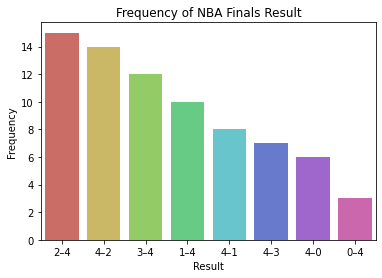

In [30]:
sns.countplot(x='Result', data=df, palette='hls',order = df['Result'].value_counts().index ) # vertical plot (# of count on y axis)
plt.title("Frequency of NBA Finals Result")
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.show()

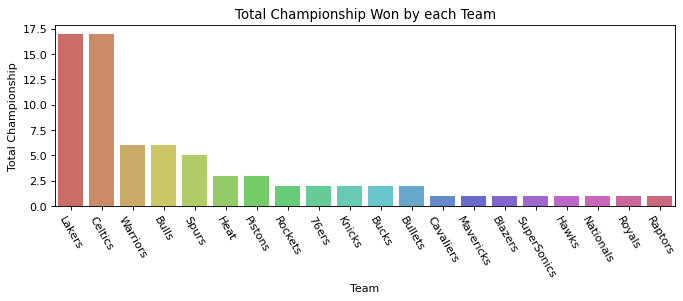

In [31]:
figure(figsize=(10, 3), dpi=80)
sns.countplot(x='champ_team', data=df, palette='hls',order = df['champ_team'].value_counts().index) # vertical plot (# of count on y axis)
plt.xticks(rotation=-60)
plt.title("Total Championship Won by each Team")
plt.xlabel("Team")
plt.ylabel("Total Championship")
plt.show()

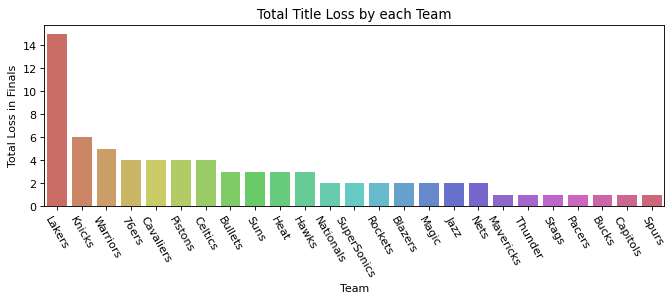

In [32]:
figure(figsize=(10, 3), dpi=80)
sns.countplot(x='lose_team', data=df, palette='hls',order = df['lose_team'].value_counts().index) # vertical plot (# of count on y axis)
plt.xticks(rotation=-60)
plt.title("Total Title Loss by each Team")
plt.xlabel("Team")
plt.ylabel("Total Loss in Finals")
plt.show()

<a href='#toc'>Back to table of content</a>

### <a id='qq'>Quick queries </a>

In [33]:
# make the calling pysqldf a bit easier
def pysqldf(q):
    return sqldf(q, globals())

In [34]:
# who has won the most championship as a franchise
q = """
select count(Champ_team) as Total, Champ_team 
from df 
group by champ_team
order by Total desc, champ_team asc
"""
include_city = pysqldf(q) # the output of the sql is a dataframe object
display(include_city)
#include_city.to_csv('include_city.csv', index=False)

,Total,champ_team
0,17,Celtics
1,17,Lakers
2,6,Bulls
3,6,Warriors
4,5,Spurs
5,3,Heat
6,3,Pistons
7,2,76ers
8,2,Bucks
9,2,Bullets


In [35]:
# who has won the most championship as a franchise
q = """
select count(champ_team) as Total, champ_team 
from df 
group by champ_team
order by Total desc, champ_team asc
"""
win = pysqldf(q) # the output of the sql is a dataframe object
win

,Total,champ_team
0,17,Celtics
1,17,Lakers
2,6,Bulls
3,6,Warriors
4,5,Spurs
5,3,Heat
6,3,Pistons
7,2,76ers
8,2,Bucks
9,2,Bullets


In [36]:
# Which franchise has lost most often in the NBA finals
q = """
select count(lose_team) as Total, lose_team 
from df 
group by lose_team
order by Total desc, lose_team asc
"""
lose = pysqldf(q)
lose

,Total,lose_team
0,15,Lakers
1,6,Knicks
2,5,Warriors
3,4,76ers
4,4,Cavaliers
5,4,Celtics
6,4,Pistons
7,3,Bullets
8,3,Hawks
9,3,Heat


In [37]:
# Which teams made the finals but never won the championship?
q = """
select lose_team, l.Total, champ_team
from lose l
left join win w
on lose_team = champ_team
where champ_team is null
"""
pysqldf(q)

,lose_team,Total,champ_team
0,Suns,3,None
1,Jazz,2,None
2,Magic,2,None
3,Nets,2,None
4,Capitols,1,None
5,Pacers,1,None
6,Stags,1,None
7,Thunder,1,None


In [38]:
# Which teams were swept in the NBA Finals and in what year?
q = """
select year, Champ_team, lose_team
from df
where lose_team_total_win = 0
"""
pysqldf(q)

,Year,champ_team,lose_team
0,1959,Celtics,Lakers
1,1971,Bucks,Bullets
2,1975,Warriors,Bullets
3,1983,76ers,Lakers
4,1989,Pistons,Lakers
5,1995,Rockets,Magic
6,2002,Lakers,Nets
7,2007,Spurs,Cavaliers
8,2018,Warriors,Cavaliers


In [39]:
# Which teams in what year pushed to game 7 in the NBA Finals?
q = """
select year, champ_team, lose_team
from df
where lose_team_total_win = 3
"""
pysqldf(q)

,Year,champ_team,lose_team
0,1951,Royals,Knicks
1,1952,Lakers,Knicks
2,1954,Lakers,Nationals
3,1955,Nationals,Pistons
4,1957,Celtics,Hawks
5,1960,Celtics,Hawks
6,1962,Celtics,Lakers
7,1966,Celtics,Lakers
8,1969,Celtics,Lakers
9,1970,Knicks,Lakers


In [40]:
# Which city has endured the most NBA Finals loss
q = """
select lose_city, count(year) as total_loss
from df
group by lose_city
order by total_loss desc, lose_team asc
"""
pysqldf(q)

,lose_city,total_loss
0,Los Angeles,14
1,New York,6
2,Philadelphia,5
3,Cleveland,4
4,Boston,4
5,Washington,3
6,St. Louis,3
7,Miami,3
8,Phoenix,3
9,Portland Trail,2


In [41]:
# Of teams who have won at least one championship, what is the probability that a team win if they make it to the final
q = """
select 
  c.champ_team as team, 
  count(c.champ_team) as total_champ
from df c 
group by team order by total_champ desc
"""
champ_sum = pysqldf(q)
display(champ_sum.head(2))

q = """
select 
  l.lose_team as team, 
  count(l.lose_team) as total_loss
from df l 
group by team order by total_loss desc
"""
loss_sum = pysqldf(q)
display(loss_sum.head(2))

q = """
select c.team, total_champ, total_loss
from champ_sum c
left join
loss_sum l
on c.team = l.team
"""
df2=pysqldf(q)
df2 = df2.fillna(0)
df2['win_percentage'] = round(df2['total_champ']/(df2['total_champ']+df2['total_loss']),3)
df2.sort_values(by='win_percentage', inplace=True, ascending=False)
df2

,team,total_champ
0,Lakers,17
1,Celtics,17


,team,total_loss
0,Lakers,15
1,Knicks,6


,team,total_champ,total_loss,win_percentage
3,Bulls,6,0.0,1.000
14,Raptors,1,0.0,1.000
13,Royals,1,0.0,1.000
4,Spurs,5,1.0,0.833
1,Celtics,17,4.0,0.810
10,Bucks,2,1.0,0.667
2,Warriors,6,5.0,0.545
0,Lakers,17,15.0,0.531
7,Rockets,2,2.0,0.500
6,Heat,3,3.0,0.500


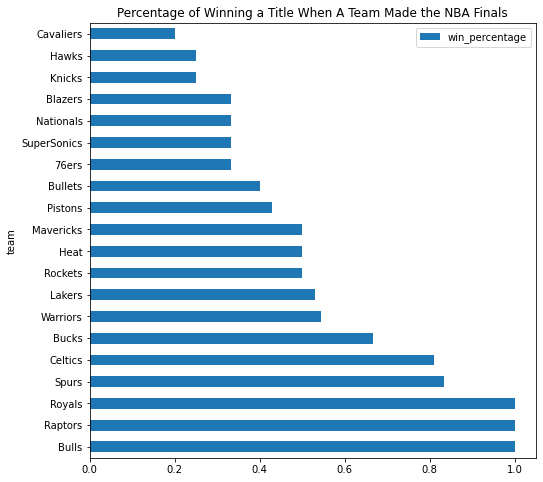

In [42]:
df2.plot(y='win_percentage', kind='barh', x='team', figsize=(8,8), logx=False, title="Percentage of Winning a Title When A Team Made the NBA Finals" )
plt.show()


In [43]:
# Who is each team nemesis? For each team that made the NBA finals, to whom did they lose to for at least twice?
q = """
select lose_team as Lost_team, champ_team as Lost_title_to, count(*) as frequency
from df
group by Lost_team, Lost_title_to
having frequency >=2
order by frequency desc
"""
nemesis = pysqldf(q)
nemesis

,Lost_team,Lost_title_to,frequency
0,Lakers,Celtics,9
1,76ers,Lakers,3
2,Cavaliers,Warriors,3
3,Celtics,Lakers,3
4,Hawks,Celtics,3
5,Knicks,Lakers,3
6,Jazz,Bulls,2
7,Lakers,Knicks,2
8,Lakers,Pistons,2
9,Nationals,Lakers,2


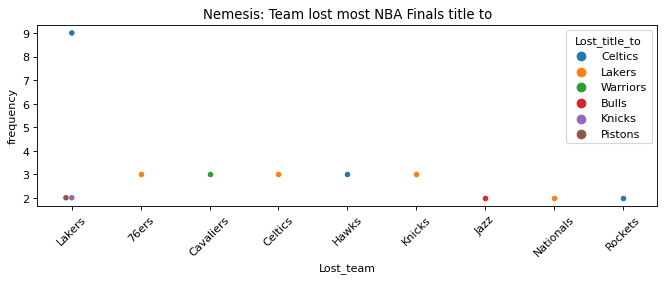

In [44]:
figure(figsize=(10, 3), dpi=80)
plt.xticks(rotation=45)
plt.title("Nemesis: Team lost most NBA Finals title to")
plt.xlabel("Team")
plt.ylabel("Total championship lost")
sns.swarmplot(x='Lost_team', y='frequency', data=nemesis, hue='Lost_title_to')
plt.savefig('nemesis.png')
plt.show()

### <a id='tableau'>Prepare data for Tableau</a>

<a href='#toc'>Back to table of content</a>

In [45]:
# create a table with two columns: team and years that the team won championship
# loop through each row
# add key (champ_team) and value (year)
champ_year = dict()
for index, row in df.iterrows():
    if row['champ_team'] in champ_year:
#         print('has key')
        temp = str(champ_year[row['champ_team']])
#         print('temp ' + temp)
        temp = temp + ", " + str(row['Year'])
#         print('temp ' + temp)
        champ_year[row['champ_team']] = temp
    else:
#         print('not key')
        champ_year[row['champ_team']] = str(row['Year'])
#         display(champ_year)
champ_year

{'Warriors': '1947, 1956, 1975, 2015, 2017, 2018',
 'Bullets': '1948, 1978',
 'Lakers': '1949, 1950, 1952, 1953, 1954, 1972, 1980, 1982, 1985, 1987, 1988, 2000, 2001, 2002, 2009, 2010, 2020',
 'Royals': '1951',
 'Nationals': '1955',
 'Celtics': '1957, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1968, 1969, 1974, 1976, 1981, 1984, 1986, 2008',
 'Hawks': '1958',
 '76ers': '1967, 1983',
 'Knicks': '1970, 1973',
 'Bucks': '1971, 2021',
 'Blazers': '1977',
 'SuperSonics': '1979',
 'Pistons': '1989, 1990, 2004',
 'Bulls': '1991, 1992, 1993, 1996, 1997, 1998',
 'Rockets': '1994, 1995',
 'Spurs': '1999, 2003, 2005, 2007, 2014',
 'Heat': '2006, 2012, 2013',
 'Mavericks': '2011',
 'Cavaliers': '2016',
 'Raptors': '2019'}

In [46]:
t = pd.DataFrame()
t['team'] = champ_year.keys()
t['years'] = champ_year.values()
t

,team,years
0,Warriors,"1947, 1956, 1975, 2015, 2017, 2018"
1,Bullets,"1948, 1978"
2,Lakers,"1949, 1950, 1952, 1953, 1954, 1972, 1980, 1982..."
3,Royals,1951
4,Nationals,1955
5,Celtics,"1957, 1959, 1960, 1961, 1962, 1963, 1964, 1965..."
6,Hawks,1958
7,76ers,"1967, 1983"
8,Knicks,"1970, 1973"
9,Bucks,"1971, 2021"


In [47]:
team_df.head(2)

,Division,Team,Founded,Joined,Team_name,City
0,Atlantic,Boston Celtics,1946,1946,Celtics,Boston
1,Atlantic,Brooklyn Nets,1967,1976,Nets,Brooklyn


In [48]:
team_df= team_df.rename(columns={"Team" : "full_name", "Team_name":"team"})
team_df.head(2)

,Division,full_name,Founded,Joined,team,City
0,Atlantic,Boston Celtics,1946,1946,Celtics,Boston
1,Atlantic,Brooklyn Nets,1967,1976,Nets,Brooklyn


In [49]:
t = t.merge(team_df, on=['team'], how='right')
display(t.head(3))
t.info()

,team,years,Division,full_name,Founded,Joined,City
0,Celtics,"1957, 1959, 1960, 1961, 1962, 1963, 1964, 1965...",Atlantic,Boston Celtics,1946,1946,Boston
1,Nets,NaN,Atlantic,Brooklyn Nets,1967,1976,Brooklyn
2,Knicks,"1970, 1973",Atlantic,New York Knicks,1946,1946,New York


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team       30 non-null     object
 1   years      16 non-null     object
 2   Division   30 non-null     object
 3   full_name  30 non-null     object
 4   Founded    30 non-null     object
 5   Joined     30 non-null     object
 6   City       30 non-null     object
dtypes: object(7)
memory usage: 1.9+ KB


In [50]:
t

,team,years,Division,full_name,Founded,Joined,City
0,Celtics,"1957, 1959, 1960, 1961, 1962, 1963, 1964, 1965...",Atlantic,Boston Celtics,1946,1946,Boston
1,Nets,NaN,Atlantic,Brooklyn Nets,1967,1976,Brooklyn
2,Knicks,"1970, 1973",Atlantic,New York Knicks,1946,1946,New York
3,76ers,"1967, 1983",Atlantic,Philadelphia 76ers,1946,1949,Philadelphia
4,Raptors,2019,Atlantic,Toronto Raptors,1995,1995,Toronto
5,Bulls,"1991, 1992, 1993, 1996, 1997, 1998",Central,Chicago Bulls,1966,1966,Chicago
6,Cavaliers,2016,Central,Cleveland Cavaliers,1970,1970,Cleveland
7,Pistons,"1989, 1990, 2004",Central,Detroit Pistons,1941,1948,Detroit
8,Pacers,NaN,Central,Indiana Pacers,1967,1976,Indiana
9,Bucks,"1971, 2021",Central,Milwaukee Bucks,1968,1968,Milwaukee


In [51]:
t.years.fillna("N/A")

0     1957, 1959, 1960, 1961, 1962, 1963, 1964, 1965...
1                                                   N/A
2                                            1970, 1973
3                                            1967, 1983
4                                                  2019
5                    1991, 1992, 1993, 1996, 1997, 1998
6                                                  2016
7                                      1989, 1990, 2004
8                                                   N/A
9                                            1971, 2021
10                                                 1958
11                                                  N/A
12                                     2006, 2012, 2013
13                                                  N/A
14                                                  N/A
15                                                  N/A
16                                                  N/A
17                                              

In [52]:
t.to_csv('champ_years.csv', index=False)

<a href='#toc'>Back to table of content</a>